# Exercice n°1 :

1. Lire et afficher l’image « exemple.jpg » :
 - Utiliser la bibliothèque Pillow pour lire l'image.
 - Utiliser Matplotlib pour afficher l'image.

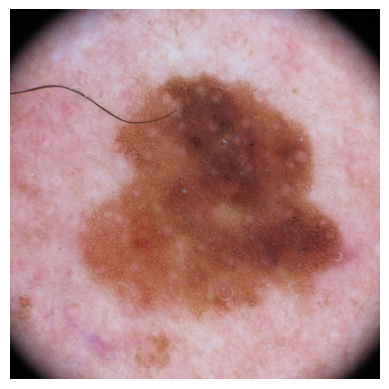

In [43]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("exemple.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

2. Chercher la taille de l’image :
 - La méthode `.size` de Pillow retourne la taille de l'image.

In [44]:
print(f"la taille de l'image est :{image.size}")

la taille de l'image est :(1024, 1024)


3. Décomposer l’image en trois plans de couleurs R, G et B :
 - Utiliser la méthode `.split()` de Pillow pour séparer les canaux R, G et B.
 - Afficher les trois plans avec Matplotlib.

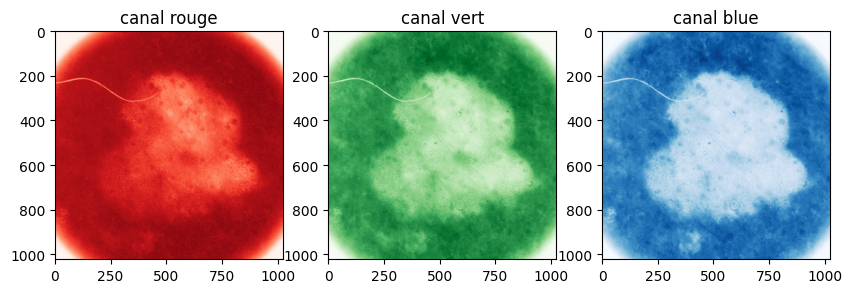

In [45]:
R_image,G_image,B_image = image.split()
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(R_image,cmap="Reds")
plt.title('canal rouge')

plt.subplot(1,3,2)
plt.imshow(G_image,cmap="Greens")
plt.title('canal vert')

plt.subplot(1,3,3)
plt.imshow(B_image,cmap="Blues")
plt.title('canal blue')

plt.show()



# Exercice n°2 :

1. Lire et afficher l’image « exemple.jpg ».
2. Calculer et afficher l’histogramme de cette image :
 - Utiliser la fonction `hist` de NumPy et Matplotlib pour tracer l'histogramme.

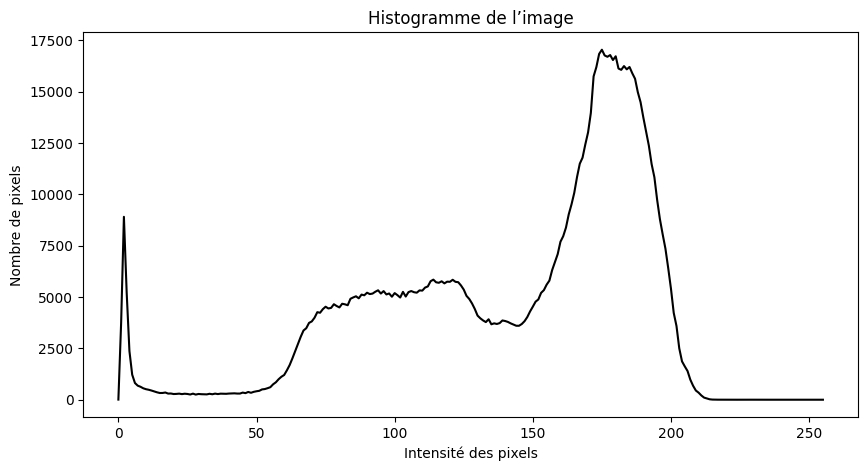

In [46]:
import numpy as np 
image_gris = image.convert("L")

# Calculer l'histogramme
histogramme = np.array(image_gris.histogram())

# Affichage de l'histogramme
plt.figure(figsize=(10, 5))
plt.plot(histogramme, color='black')
plt.title("Histogramme de l’image")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.show()

3. Méthode pour l’amélioration de la luminance :
 - Appliquer une transformation linéaire ou une normalisation des pixels

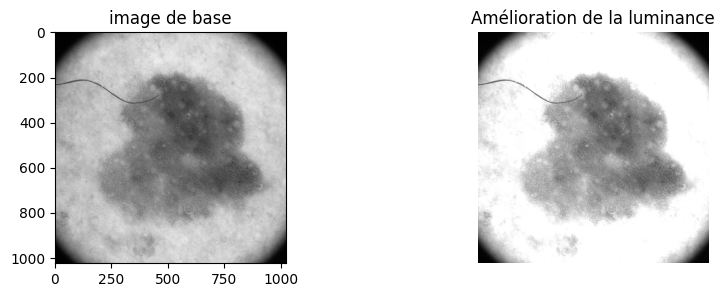

In [47]:

def augmenter_luminance(image, facteur=1.5):
    image_np = np.array(image, dtype=np.float32) * facteur
    image_np = np.clip(image_np, 0, 255).astype(np.uint8)
    return Image.fromarray(image_np)

# Appliquer l’amélioration de la luminance
image_lumineuse = augmenter_luminance(image_gris)

plt.figure(figsize=(10,3))
# Afficher l’image de base
plt.subplot(1,2,1)
plt.imshow(image_gris,cmap="gray")
plt.title("image de base")

# Afficher l’image améliorée
plt.subplot(1,2,2)
plt.imshow(image_lumineuse, cmap="gray")
plt.title("Amélioration de la luminance")
plt.axis("off")
plt.show()

### Amélioration du contraste
🔸 Méthode 1 : Égalisation d’histogramme

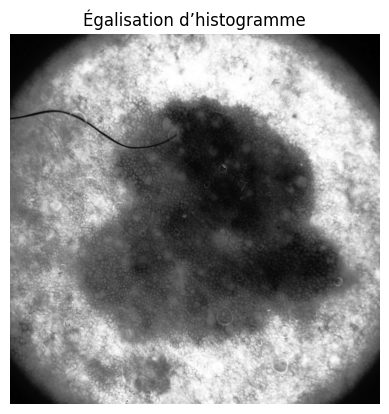

In [48]:
import cv2
# Convertir l'image en niveaux de gris (pour OpenCV)
image_cv = np.array(image_gris)

# Appliquer l’égalisation d’histogramme
image_eq = cv2.equalizeHist(image_cv)

# Afficher l’image après égalisation d’histogramme
plt.imshow(image_eq, cmap="gray")
plt.title("Égalisation d’histogramme")
plt.axis("off")
plt.show()




🔸 Méthode 2 : Transformation logarithmique

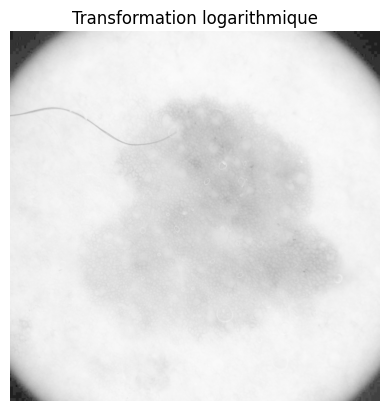

In [49]:
def transformation_log(image, c=1):
    image_np = np.array(image, dtype=np.float32)
    image_log = c * np.log(1 + image_np)
    image_log = np.clip(image_log * (255 / np.max(image_log)), 0, 255).astype(np.uint8)
    return Image.fromarray(image_log)

# Appliquer la transformation logarithmique
image_log = transformation_log(image_gris)

# Afficher l’image transformée
plt.imshow(image_log, cmap="gray")
plt.title("Transformation logarithmique")
plt.axis("off")
plt.show()

### Conversion en image binaire

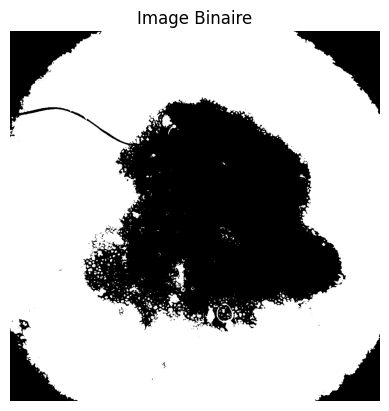

In [50]:
# Appliquer un seuil de binarisation (0.5 sur une échelle de 255 => 127)

# Charger et convertir en gris
image = Image.open("exemple.jpg")
image_gris = image.convert('L')
image_array = np.array(image_gris)
seuil = 127
height, width = image_array.shape
image_bin = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        if image_array[i,j] > seuil:
            image_bin[i,j] = 255
        else:
            image_bin[i,j] = 0
plt.show()
plt.title("Image Binaire")
plt.axis("off") 
plt.show()

# Exercice 3 : Images binaires et opérations logiques

Text(0.5, 1.0, 'Image C (A - B)')

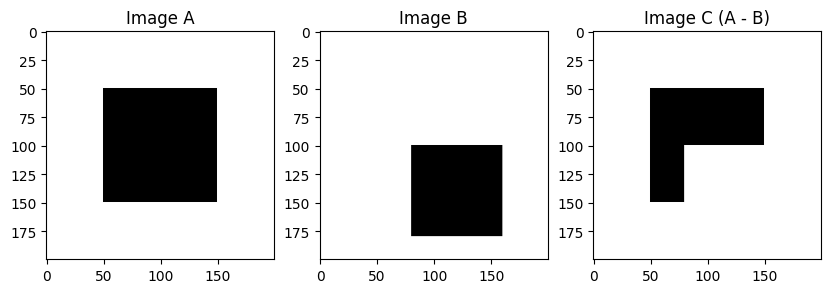

In [51]:
# Définir la taille de l’image
taille = (200, 200)

# Créer une image A avec un rectangle noir
image_A = np.ones(taille, dtype=np.uint8) * 255  # Image blanche
image_A[50:150, 50:150] = 0  # Rectangle noir

# Créer une image B avec un rectangle noir chevauchant A
image_B = np.ones(taille, dtype=np.uint8) * 255
image_B[100:180, 80:160] = 0  # Deuxième rectangle noir

# Trouver les pixels où A contient 1 et B ne contient pas de 1
#image_C = np.where((image_A == 0) & (image_B != 0), 0, 255).astype(np.uint8)

# Initialiser une image C blanche
image_C = np.ones(taille, dtype=np.uint8) * 255  

# Appliquer l'opération logique avec une boucle
for i in range(taille[0]):  # Parcours des lignes
    for j in range(taille[1]):  # Parcours des colonnes
        if image_A[i, j] == 0 and image_B[i, j] != 0:
            image_C[i, j] = 0  # On garde les pixels de A qui ne sont pas dans B

# Afficher les images
# Affichage en sous-graphiques
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_A, cmap="gray")
plt.title("Image A")

plt.subplot(1, 3, 2)
plt.imshow(image_B, cmap="gray")
plt.title("Image B")

plt.subplot(1, 3, 3)
plt.imshow(image_C, cmap="gray")
#plt.axis("off")
plt.title("Image C (A - B)")

### Affichage de tout les image creer pour comparaison

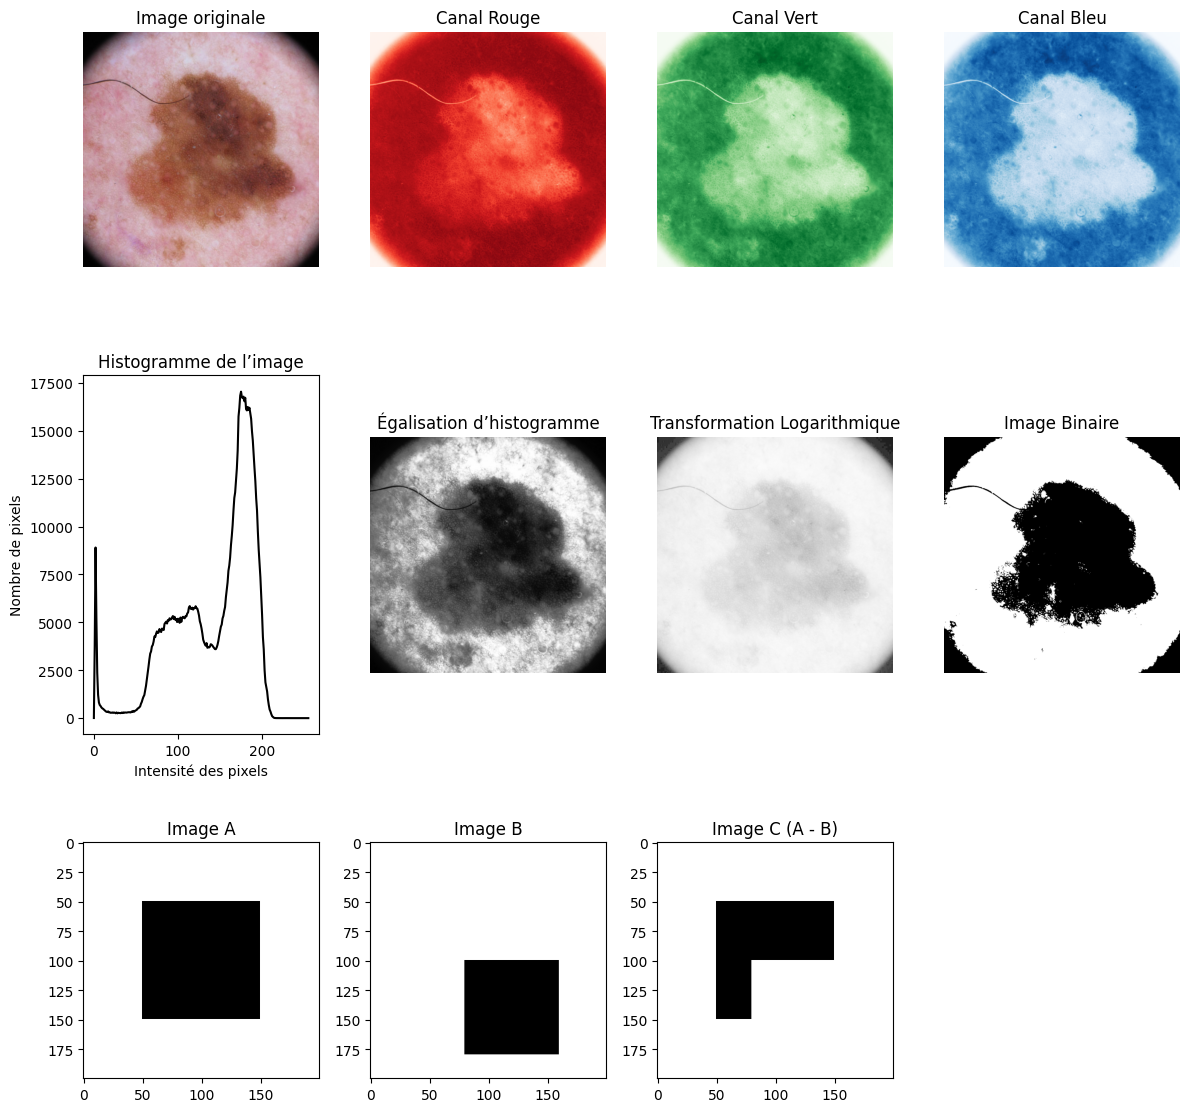

In [52]:
# Affichage avec une disposition optimisée
plt.figure(figsize=(12, 12))

# Première ligne : Image originale et ses canaux R, G, B
plt.subplot(3, 4, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Image originale")

plt.subplot(3, 4, 2)
plt.imshow(R_image, cmap="Reds")
plt.axis("off")
plt.title("Canal Rouge")

plt.subplot(3, 4, 3)
plt.imshow(G_image, cmap="Greens")
plt.axis("off")
plt.title("Canal Vert")

plt.subplot(3, 4, 4)
plt.imshow(B_image, cmap="Blues")
plt.axis("off")
plt.title("Canal Bleu")

# Deuxième ligne : Histogramme et améliorations
plt.subplot(3, 4, 5)
plt.plot(histogramme, color='black')
plt.title("Histogramme de l’image")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")

plt.subplot(3, 4, 6)
plt.imshow(image_eq, cmap="gray")
plt.axis("off")
plt.title("Égalisation d’histogramme")

plt.subplot(3, 4, 7)
plt.imshow(image_log, cmap="gray")
plt.axis("off")
plt.title("Transformation Logarithmique")

plt.subplot(3, 4, 8)
plt.imshow(image_bin, cmap="gray")
plt.axis("off")
plt.title("Image Binaire")

# Troisième ligne : Opérations binaires sur les images
plt.subplot(3, 4, 9)
plt.imshow(image_A, cmap="gray")
#plt.axis("off")
plt.title("Image A")# Charger et convertir en gris
image = Image.open("exemple.jpg")
image_gris = image.convert('L')
image_array = np.array(image_gris)

plt.subplot(3, 4, 10)
plt.imshow(image_B,cmap="gray")
#plt.axis("off")
plt.title("Image B")# Charger et convertir en gris
image = Image.open("exemple.jpg")
image_gris = image.convert('L')
image_array = np.array(image_gris)

plt.subplot(3, 4, 11)
plt.imshow(image_C, cmap="gray")
#plt.axis("off")
plt.title("Image C (A - B)")
plt.show()